In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The data used in this can be found on https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor

glass = pd.read_csv("glassdoor.csv")
country_codes = pd.read_csv("country_names_2_digit_codes.csv", index_col=1)

In [3]:
glass.shape

(165290, 163)

In [4]:
glass.head()

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,...,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.negativeTemplate,salary.currency.new,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu
0,0.0,2801.0,2801.0,0,NaN,2801,-1,2183810,Modus Group,501-1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2483.0,NaN
1,4.0,2802.0,2802.0,3,NaN,2802,-1,10416,Boehringer Ingelheim,10000--1,...,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$(#),False,$#,&pound;,2019-10-14T06:05:58,2484.0,NaN
2,0.0,2803.0,2803.0,0,NaN,2803,-1,1043373,Immobiliare.it,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.0,NaN
3,0.0,2804.0,2804.0,0,NaN,2804,-1,2226886,Codup,1-50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2486.0,NaN
4,0.0,2805.0,2805.0,0,NaN,2805,-1,851555,Markelytics Solutions,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2487.0,NaN


In [5]:
print(glass.columns.values)

['benefits.benefitRatingDecimal' 'benefits.comments' 'benefits.highlights'
 'benefits.numRatings' 'benefits.employerSummary' 'breadCrumbs'
 'gaTrackerData.category' 'gaTrackerData.empId' 'gaTrackerData.empName'
 'gaTrackerData.empSize' 'gaTrackerData.expired' 'gaTrackerData.industry'
 'gaTrackerData.industryId' 'gaTrackerData.jobId.long'
 'gaTrackerData.jobId.int' 'gaTrackerData.jobTitle'
 'gaTrackerData.location' 'gaTrackerData.locationId'
 'gaTrackerData.locationType' 'gaTrackerData.pageRequestGuid.guid'
 'gaTrackerData.pageRequestGuid.guidValid'
 'gaTrackerData.pageRequestGuid.part1'
 'gaTrackerData.pageRequestGuid.part2' 'gaTrackerData.sector'
 'gaTrackerData.sectorId'
 'gaTrackerData.profileConversionTrackingParams.trackingCAT'
 'gaTrackerData.profileConversionTrackingParams.trackingSRC'
 'gaTrackerData.profileConversionTrackingParams.trackingXSP'
 'gaTrackerData.jobViewTrackingResult.jobViewDisplayTimeMillis'
 'gaTrackerData.jobViewTrackingResult.requiresTracking'
 'gaTrackerData

In [6]:
country_list = glass["map.country"].dropna()
#for x in pd.Series(country_list.unique()).sort_values():
#   print(x)

In [7]:
#country_list = country_list.map(country_codes["Name"])

country_list_new = pd.Series([country_codes.loc[x,"Name"] if x in country_codes.index else x for x in country_list])
country_list_new

0              Poland
1               Italy
2            Pakistan
3               India
4              Israel
             ...     
115257        Hungary
115258          Japan
115259        Belgium
115260    Netherlands
115261      Singapore
Length: 115262, dtype: object

In [8]:
glass_country = pd.DataFrame(data = [country_list_new.value_counts().index, country_list_new.value_counts().values], index=["country","count"]).T
glass_country["count"] = pd.to_numeric(glass_country["count"])
glass_country.set_index("country", drop=True, inplace=True)

top_x = 10
glass_country_top = glass_country.head(top_x)
glass_country_top

,count
country,
India,5166
Belgium,4941
Netherlands,4620
France,4566
Germany,4535
Singapore,4390
Hong Kong,4346
Australia,3904
United Kingdom,3696


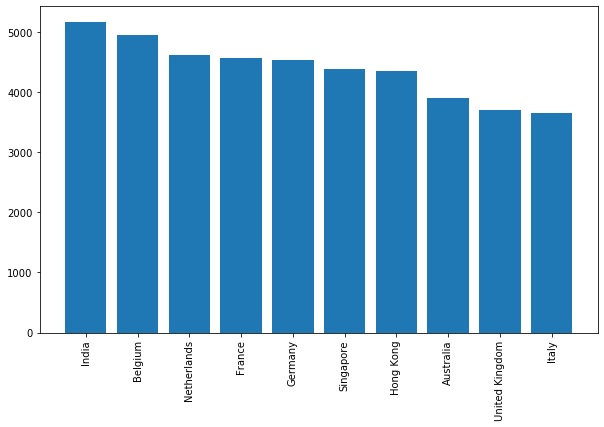

In [9]:
#plt.figsize=(12,6)
plt.bar(glass_country_top.index,glass_country_top["count"])
plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,6)
plt.show()